In [26]:
from UZ_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os


# Exercise 1: Basic image processing

### (a) Read the image from the file umbrellas.jpg and display it

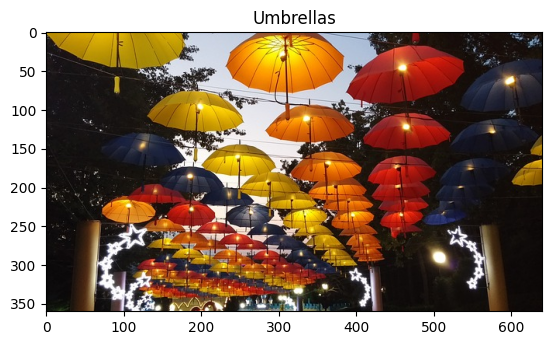

In [27]:
I = imread('./images/umbrellas.jpg')
imshow(I, 'Umbrellas')

In [28]:
height, width, channels = I.shape
type = I.dtype
print(f'Height: {height}\nWidth: {width}\nChannels: {channels}\nType: {type}')

Height: 360
Width: 640
Channels: 3
Type: float64


### (b) Convert the loaded image to grayscale

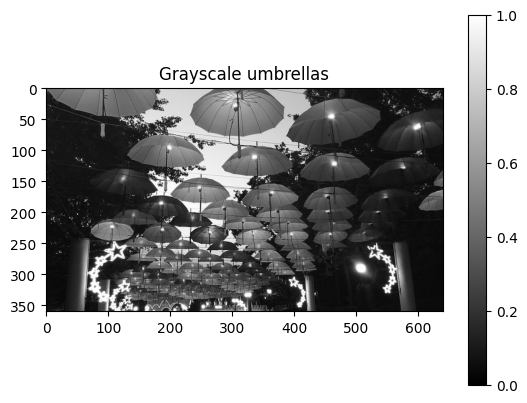

In [29]:
def to_grayscale(I):
    return (I[:,:,0] + I[:,:,1] + I[:,:,2]) / 3

gray = to_grayscale(I)
imshow(gray, 'Grayscale umbrellas')

### (c) Cut and display a specific part of the loaded image

https://matplotlib.org/stable/users/explain/colors/colormaps.html

We have to reverse cmap with appending _r

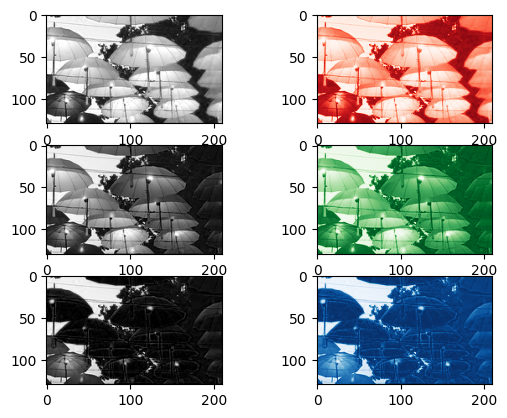

In [30]:
plt.subplot(3,2,1)
plt.imshow(I[130:260, 240:450, 0], cmap='gray')
plt.subplot(3,2,2)
plt.imshow(I[130:260, 240:450, 0], cmap='Reds_r')

plt.subplot(3,2,3)
plt.imshow(I[130:260, 240:450, 1], cmap='gray')
plt.subplot(3,2,4)
plt.imshow(I[130:260, 240:450, 1], cmap='Greens_r')

plt.subplot(3,2,5)
plt.imshow(I[130:260, 240:450, 2], cmap='gray')
plt.subplot(3,2,6)
plt.imshow(I[130:260, 240:450, 2], cmap='Blues_r')

plt.show()

**Question:** Why would you use different color maps?

**Answer:** To get better visualization of similar values

### (d) Write a script that inverts a rectangular part of the image.

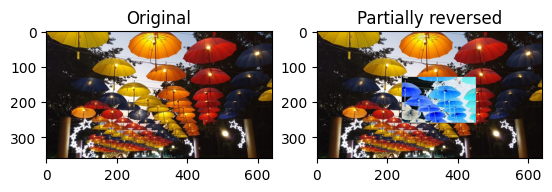

In [31]:
partially_rev = I.copy()
partially_rev[130:260, 240:450] = 1 - partially_rev[130:260, 240:450]
plt.subplot(1, 2, 1)
plt.imshow(I, )
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(partially_rev)
plt.title('Partially reversed')
plt.show()

**Question:** How is inverting a grayscale value defined?

**Answer:** By substracting it from maximum possible value. In my case since all values are normalized to [0, 1], I substract from 1

### (e) Perform a reduction of grayscale levels in the image

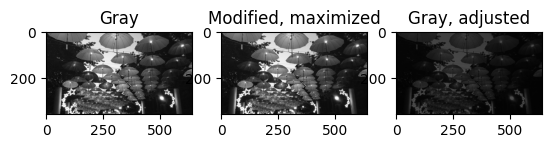

In [32]:
# already converted to gray in (b)
scalar = 0.3
modified = gray * 0.3

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Gray')
plt.subplot(1,3,2)
plt.imshow(modified, cmap='gray')
plt.title('Modified, maximized')
plt.subplot(1,3,3)
plt.imshow(modified, vmin=0, vmax=1, cmap='gray')
plt.title('Gray, adjusted')
plt.show()

# Exercise 2: Thresholding and histograms

### (a) Create a binary mask from a grayscale image

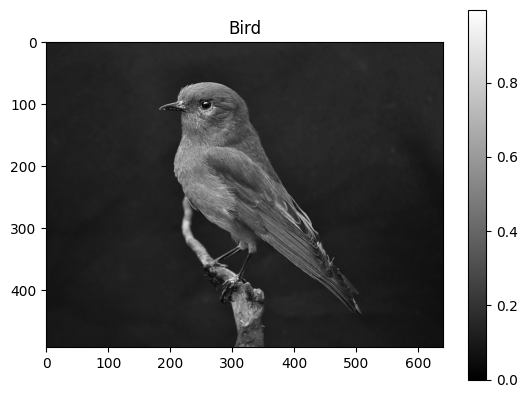

In [33]:
bird = imread_gray('./images/bird.jpg')
imshow(bird, 'Bird')

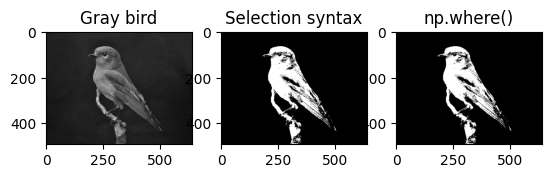

In [34]:
mask1 = bird.copy()
treshold = 0.29

mask1[mask1 < treshold] = 0
mask1[mask1 >= treshold] = 1

mask2 = np.where(bird < treshold, 0, 1).astype(np.uint8)

plt.subplot(1,3,1)
plt.imshow(bird, cmap='gray')
plt.title('Gray bird')
plt.subplot(1,3,2)
plt.imshow(mask1, cmap='gray')
plt.title('Selection syntax')
plt.subplot(1,3,3)
plt.imshow(mask2, cmap='gray')
plt.title('np.where()')
plt.show()


### (b) Write a function myhist that accepts a grayscale image and the number of bins that will be used in building a histogram

In [35]:
def myhist(I, bins=256):
    """
    I: image with values within [0, 1]
    bins: Number of bins

    Returns: histogram with n bins of image I
    """
    vect = I.reshape(-1)
    H = np.zeros(bins)

    # not so efficient
    # for val in vect:
    #     H[min(int(val * bins), bins - 1)] += 1

    # more efficient
    bin_idx = np.clip((vect * bins).astype(int), 0, bins - 1)
    H = np.bincount(bin_idx, minlength=bins)
    
    return H / np.sum(H)

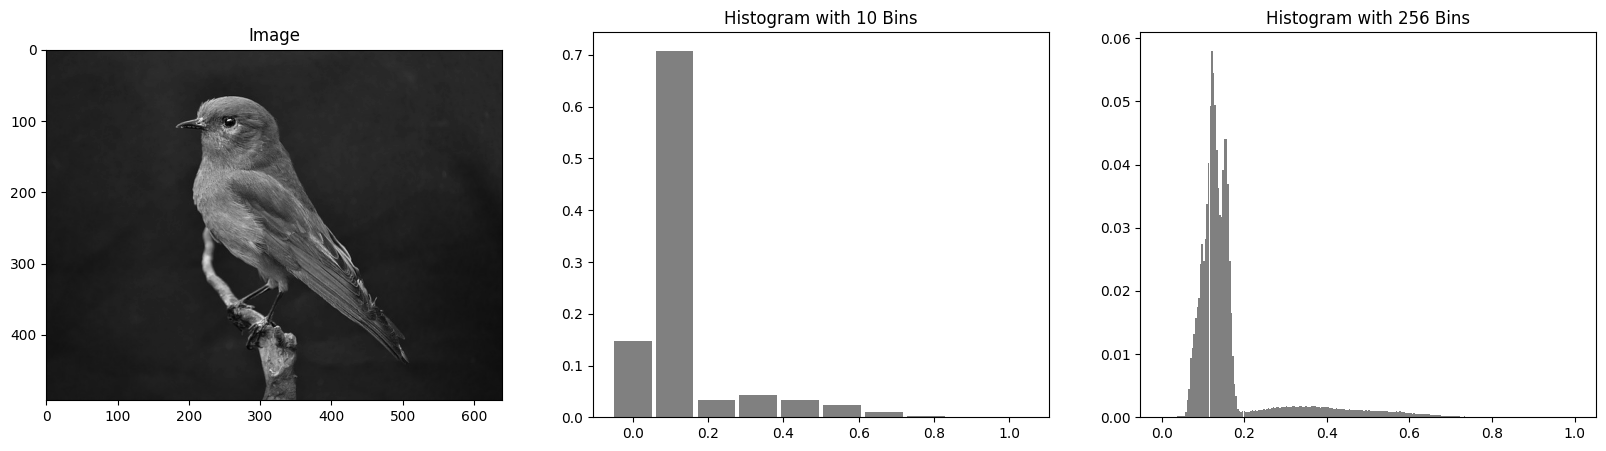

In [36]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.imshow(bird, cmap='gray')
plt.title("Image")

plt.subplot(1, 3, 2)
bins = 10
bird_H_20 = myhist(bird, bins)
plt.bar(np.linspace(0, 1, bins), bird_H_20, width=1/bins, color='gray')
plt.title(f"Histogram with {bins} Bins")

plt.subplot(1, 3, 3)
bins = 256
bird_H_20 = myhist(bird, bins)
plt.bar(np.linspace(0, 1, bins), bird_H_20, width=1/bins, color='gray')
plt.title(f"Histogram with {bins} Bins")

plt.show()


**Question**: The histograms are usually normalized by dividing the result by the
sum of all cells. Why is that?

**Answer**: To accurately compare images of different sizes/resolutions

### (c) Modify your function myhist to no longer assume the [0, 1] range for values


In [37]:
def myhist2(I, bins=256):
    """
    I: image
    bins: Number of bins

    Returns: histogram with n bins of image I
    """
    vect = I.reshape(-1)
    mini = np.min(vect)
    maxi = np.max(vect)
    vect = (vect - mini) / (maxi - mini)


    H = np.zeros(bins)

    bin_idx = np.clip((vect * bins).astype(int), 0, bins - 1)
    H = np.bincount(bin_idx, minlength=bins)
    
    return H / np.sum(H)

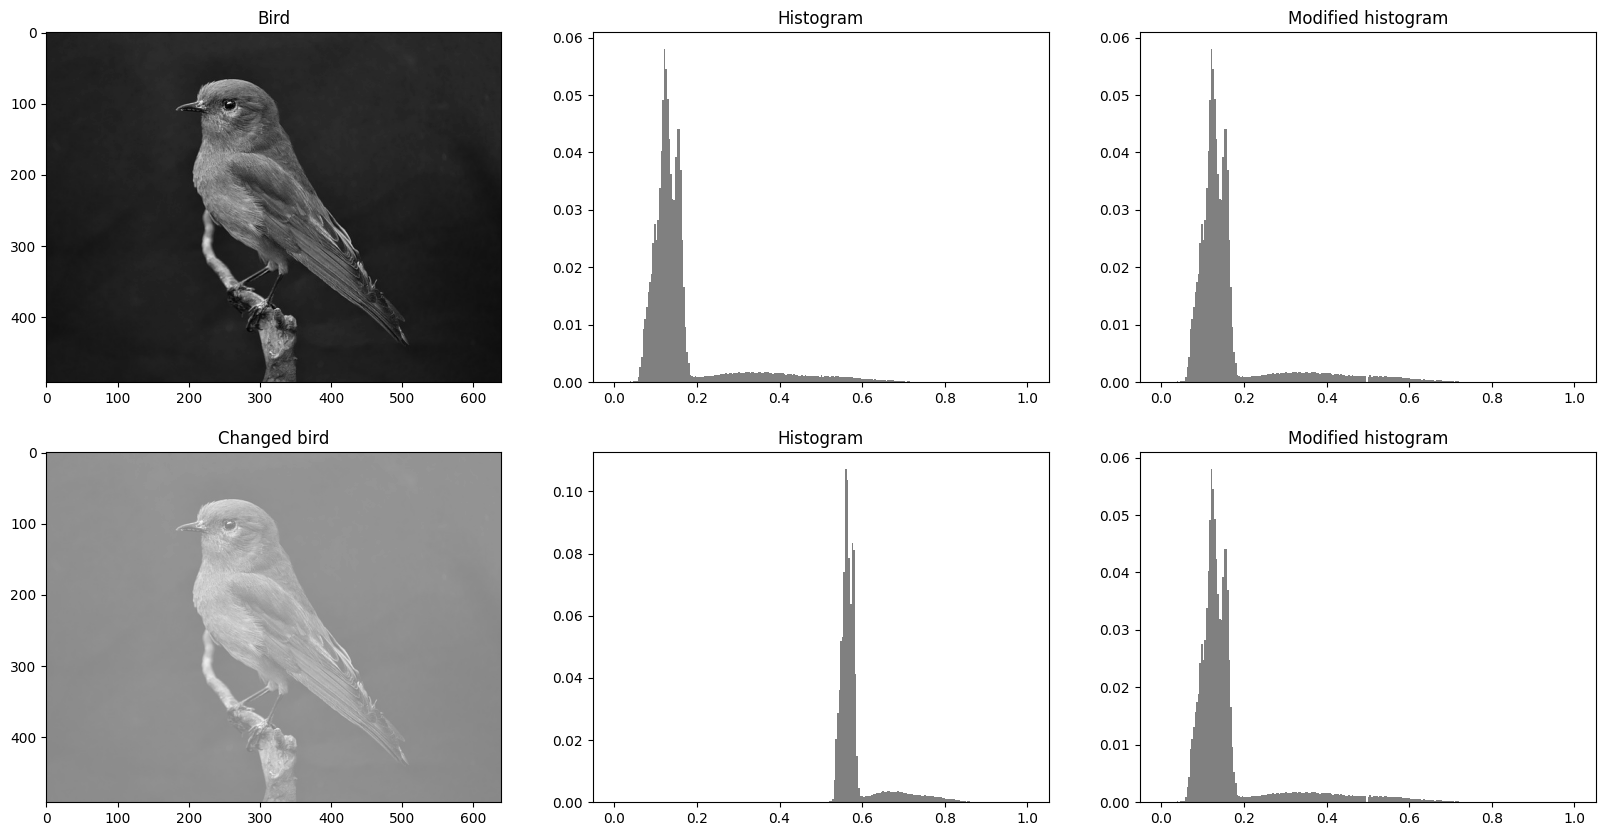

In [38]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
plt.imshow(bird, vmin=0, vmax=1, cmap='gray')
plt.title("Bird")

plt.subplot(2, 3, 2)
hist = myhist(bird)
plt.bar(np.linspace(0, 1, bins), hist, width=1/256, color='gray')
plt.title(f"Histogram")

plt.subplot(2, 3, 3)
modhist = myhist2(bird)
plt.bar(np.linspace(0, 1, bins), modhist, width=1/256, color='gray')
plt.title(f"Modified histogram")

darker_bird = bird * 0.5 + 0.5

plt.subplot(2, 3, 4)
plt.imshow(darker_bird, vmin=0, vmax=1, cmap='gray')
plt.title("Changed bird")

plt.subplot(2, 3, 5)
hist = myhist(darker_bird)
plt.bar(np.linspace(0, 1, bins), hist, width=1/256, color='gray')
plt.title(f"Histogram")

plt.subplot(2, 3, 6)
modhist = myhist2(darker_bird)
plt.bar(np.linspace(0, 1, bins), modhist, width=1/256, color='gray')
plt.title(f"Modified histogram")

plt.show()


### (d) Test myhist function on images of the same scene in different lighting conditions


In [39]:
def testing_lightning(folder_path, n_bins):
    """
    folder_path: path to the folder containing images
    n_bins: number of bins for histogram
    """

    paths = []
    for file in os.listdir(folder_path):
        if file.endswith(('.jpg', '.png')):
            paths.append(os.path.join(folder_path, file))

    n = len(paths)
    
    if n == 0:
        print("Folder should contain some images")
        return

    fig, axes = plt.subplots(n, 2, figsize=(10, 5 * n))
    
    for i, img_path in enumerate(paths):
        image = imread_gray(img_path)
        
        axes[i, 0].imshow(image, cmap="gray")
        axes[i, 0].set_title(f"Image {i+1}")
        axes[i, 0].axis('off')
        
        h = myhist2(image, n_bins)
        axes[i, 1].bar(np.linspace(0, 1, n_bins), h, width=1/n_bins)
        axes[i, 1].set_title(f"Histogram {i+1}")
    

    plt.show()


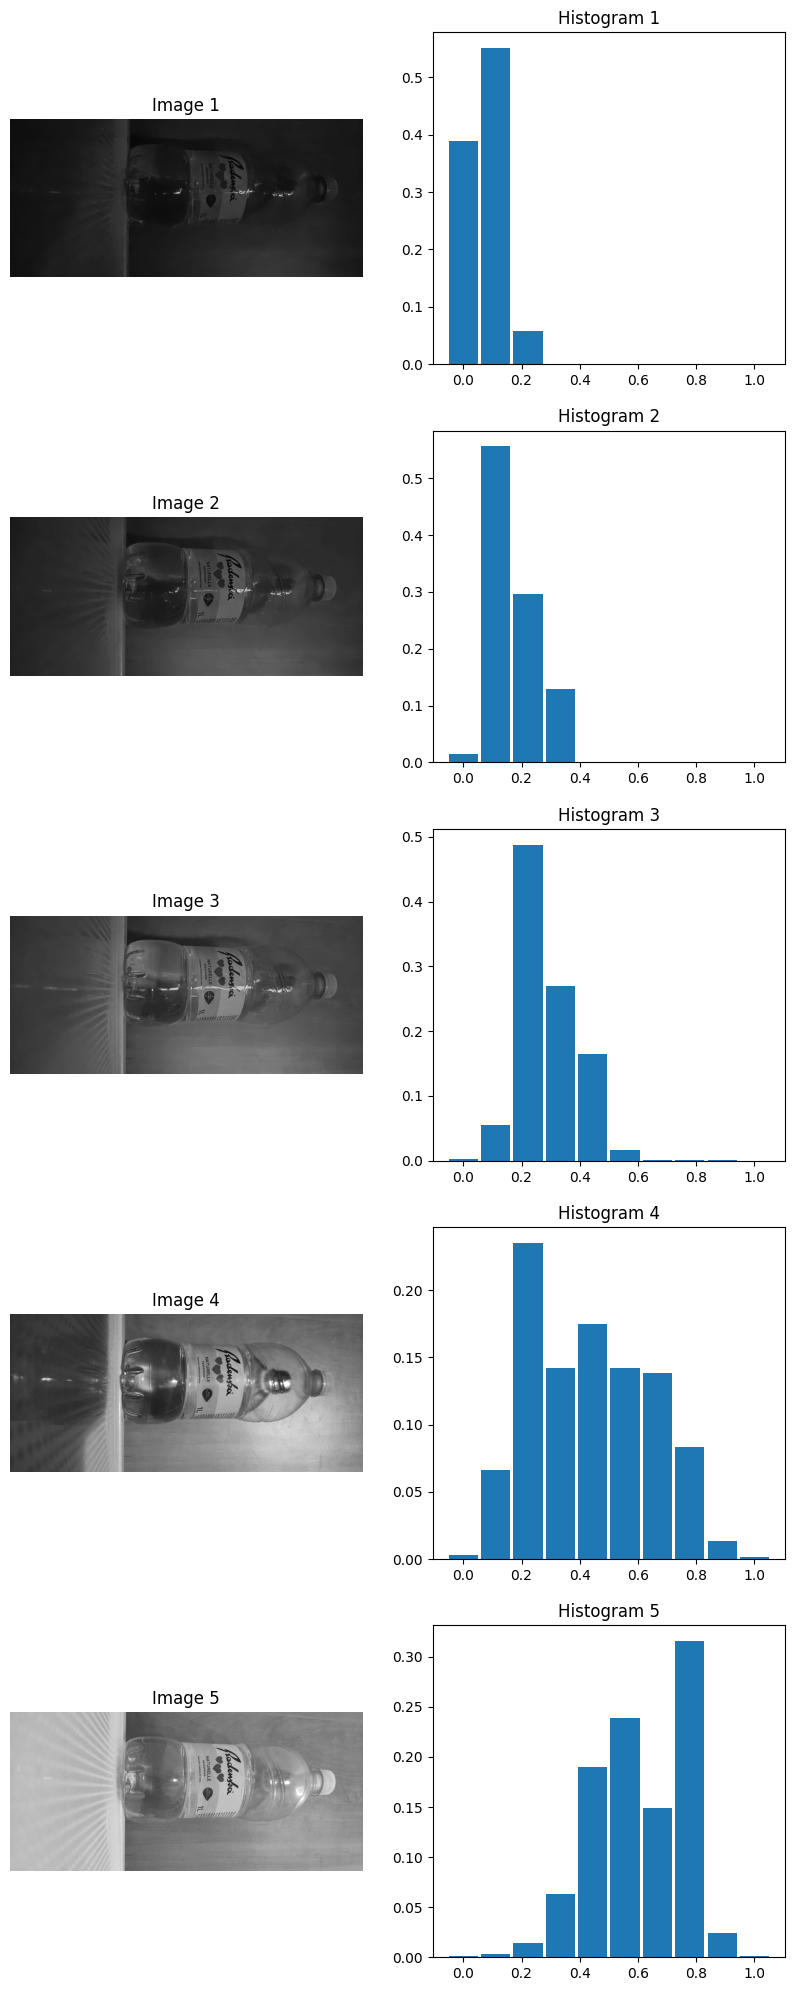

In [40]:
folder_path = "Light test"
testing_lightning(folder_path, n_bins=10)

### (e) Implement [Otsu’s](https://en.wikipedia.org/wiki/Otsu%27s_method#Algorithm) method for automatic threshold calculation

From wiki:
1. Compute histogram and probabilities of each intensity level
2. Set up initial ω_i(0) and μ_i(0)
   - ω_i: weight (probability) for each class (background and foreground)
   - μ_i: mean for each class
   1. Step through all possible thresholds t = 1, ..., maximum intensity
   2. Compute σ_b²(t) (between-class variance)
5. Desired threshold corresponds to the maximum σ_b²(t)

In [41]:
def otsu(I, n_bins=256):

    # 1. histogram
    h = myhist2(I, n_bins)
    
    cum_sum = np.cumsum(h)
    cum_mean = np.cumsum(h * np.arange(n_bins))
    
    total_mean = cum_mean[-1]
    
    back_w = cum_sum
    fore_w = 1 - cum_sum
    
    # Preprečimo deljenje z ničlo
    valid_mask = (back_w > 0) & (fore_w > 0)
    
    mean_back = cum_mean / back_w
    mean_fore = (total_mean - cum_mean) / fore_w
    
    # Varianca za vse možne prage
    variance = back_w * fore_w * ((mean_back - mean_fore) ** 2)
    
    # Poišči prag, ki maksimizira varianco
    max_variance_index = np.argmax(variance[valid_mask])
    optimal_treshold = np.where(valid_mask)[0][max_variance_index]
    
    # Normalizacija na [0, 1]
    return optimal_treshold / (n_bins - 1)


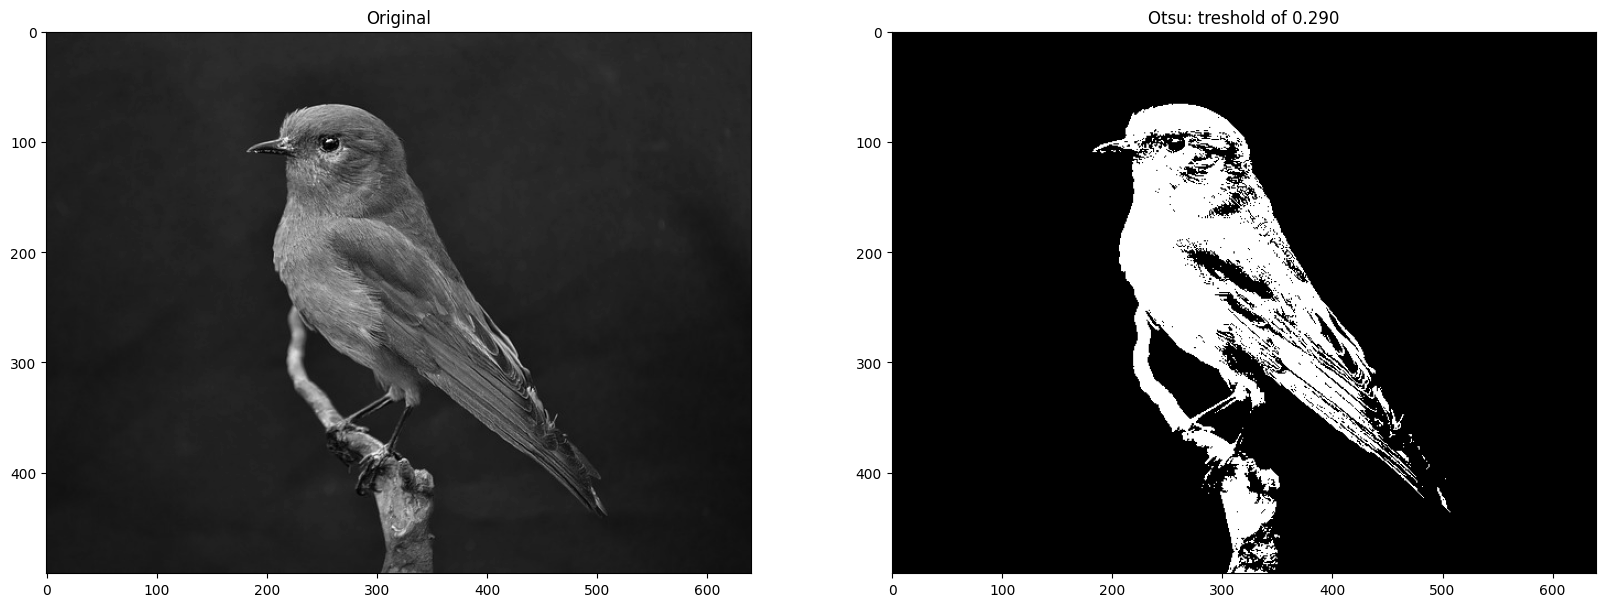

In [42]:
def otsu_display(grayscale_image):
    plt.figure(figsize=(20,10))

    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap = "gray")
    plt.title("Original")

    treshold = otsu(grayscale_image)
    plt.subplot(1, 2, 2)
    plt.imshow(np.where(grayscale_image < treshold, 0, 1).astype(np.uint8), cmap = "gray")
    plt.title(f"Otsu: treshold of {treshold:.3f}")

    plt.show()

otsu_display(bird)

# Exercise 3: Morphological operations and regions

###  (a) Morphological operations erosion and dilation.

In [43]:
def display_morph(I, n):
    '''
    I: grayscale image
    n: size of n*n (square) structuring element
    '''
    SE = np.ones((n, n))

    I_eroded = cv2.erode(I, SE)
    I_dilated = cv2.dilate(I, SE)
    erode_dilate = cv2.erode(cv2.dilate(I, SE), SE)
    dilate_erode = cv2.dilate(cv2.erode(I, SE), SE)

    plt.figure(figsize=(5,5))
    plt.suptitle(f"SE is of size {n}px*{n}px", fontsize=16)

    #show eroded
    plt.subplot(2, 2, 1)
    plt.imshow(I_eroded, cmap = "gray")
    plt.title("eroded")

    #show dilated
    plt.subplot(2, 2, 2)
    plt.imshow(I_dilated, cmap = "gray")
    plt.title("dilated")

    #show first dilated, then eroded
    plt.subplot(2, 2, 3)
    plt.imshow(erode_dilate, cmap = "gray")
    plt.title("First dilated, then eroded")

    #show first eroded, then dilated
    plt.subplot(2, 2, 4)
    plt.imshow(dilate_erode, cmap = "gray")
    plt.title("First eroded, then dilated")

    plt.tight_layout()
    plt.show()

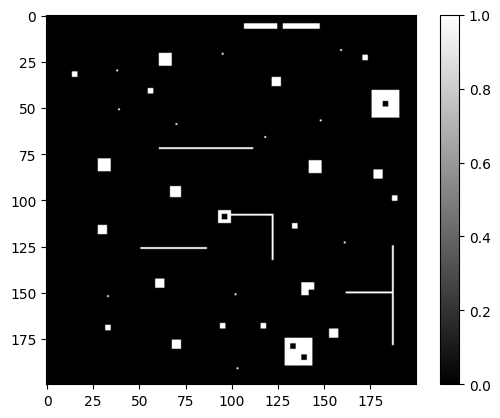

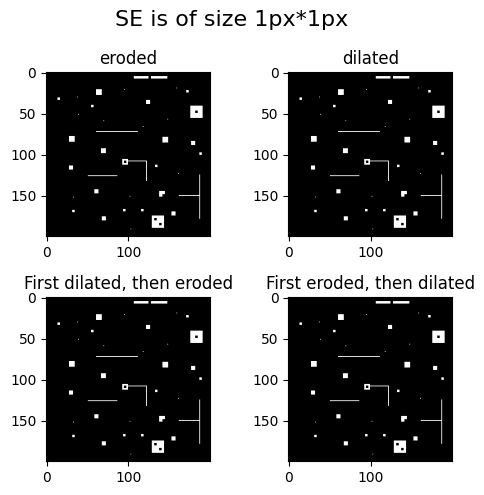

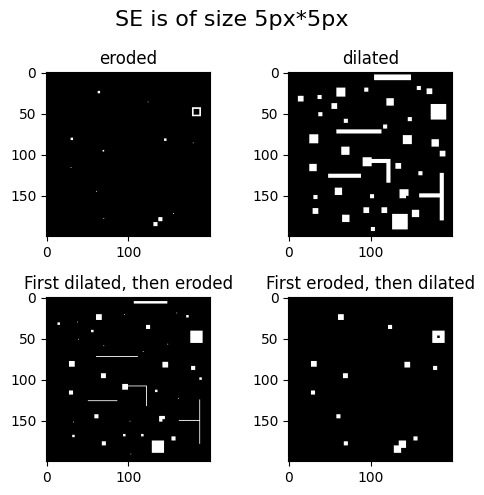

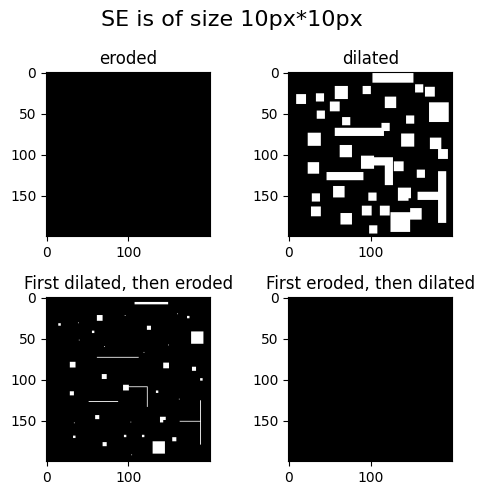

In [44]:
mask = imread_gray('images/mask.png')
imshow(mask)
display_morph(mask, 1)
display_morph(mask, 5)
display_morph(mask, 10)

**Question:** Based on the results, which order of erosion and dilation operations produces opening and which closing?

**Answer:** We get opening with first erosion, then dilation. We get closing with first dilation, then erosion

### (b) Cleaning up bird.jpg

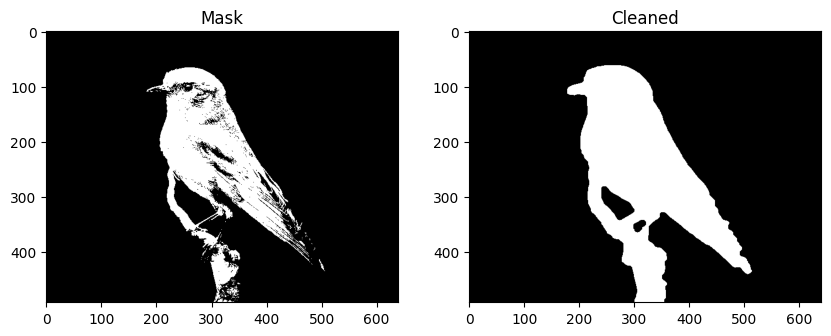

In [45]:
bird = imread('images/bird.jpg')
gray_bird = to_grayscale(bird)
treshold = otsu(gray_bird)
mask = np.where(gray_bird < treshold, 0, 1).astype(np.uint8)

kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 12))  # Larger kernel for closing
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))    # Smaller kernel for opening

dilated = cv2.dilate(mask, kernel_close, iterations=1)

closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel_close)

opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_open)

plt.figure(figsize=(10,5))

#show eroded
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap = "gray")
plt.title("Mask")

#show dilated
plt.subplot(1, 2, 2)
plt.imshow(opened, cmap = "gray")
plt.title("Cleaned")

plt.show()


### (e) Write a function immask

In [46]:
def inmask(I, mask, setTo = 0.0):
    '''
    I: three channel image
    mask: binary mask of I
    SetTo: what value to set, default is 0.0 (black)

    Returns: image where pixel values are set to black if the corresponding pixel in the mask is equal to 0
    '''
    tmp = I.copy()
    tmp[mask == 0] = setTo
    return tmp


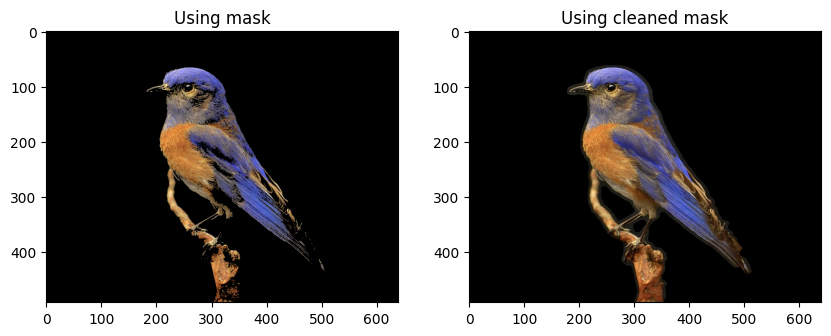

In [47]:
plt.figure(figsize=(10,5))

using_mask = inmask(bird, mask)
using_cleaned = inmask(bird, opened)

plt.subplot(1, 2, 1)
plt.imshow(using_mask)
plt.title("Using mask")

plt.subplot(1, 2, 2)
plt.imshow(using_cleaned)
plt.title("Using cleaned mask")

plt.show()

### (d) Mask from eagle.jpg

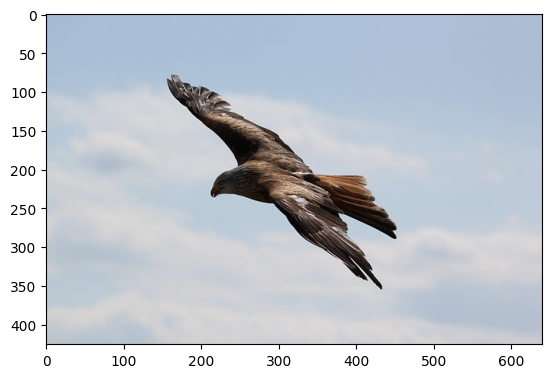

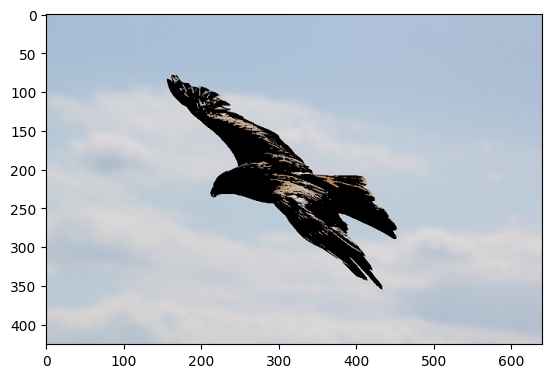

In [48]:
eagle = imread('images/eagle.jpg')
gray_eagle = to_grayscale(eagle)
treshold = otsu(gray_eagle)
mask = np.where(gray_eagle < treshold, 0, 1).astype(np.uint8)

imshow(eagle)
imshow(inmask(eagle, mask))

**Question:** 
1. Why is the background included in the mask and not the object? 
2. How would you fix that in general? (just inverting the mask if necessary doesn’t count)

**Answer:** 
1. Because Otsu's method selects a threshold that minimizes variance within the foreground and background but doesn’t explicitly differentiate between them. It often classifies darker areas as the background.
2. In general I thought of some solutions:
    - using (Canny's) edge detection followed by contour (sl. Obris) detection to trace boundaries
    - More modern approaches involve training machine learning models on labeled datasets (background, foreground) using techniques like semantic segmentation (each pixel gets a category).

### (e) Extract connected components

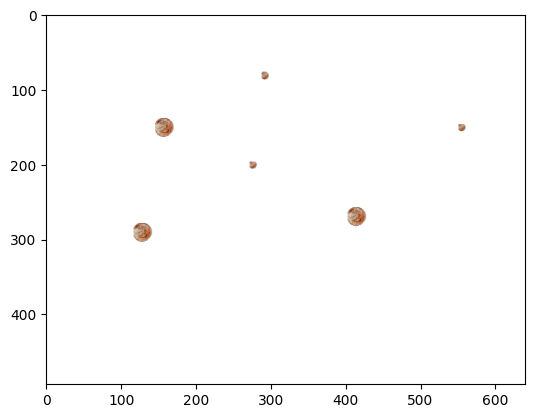

In [49]:
coins = imread('images/coins.jpg')
inv_coins = 1 - coins
graycoins = to_grayscale(inv_coins)
treshold = otsu(graycoins)
coins_mask = np.where(graycoins < treshold, 0, 1).astype('float64')
n = 10
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n, n))
clean_mask = cv2.erode(cv2.dilate(np.copy(coins_mask), SE), SE)

max_size = 700
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(clean_mask.astype(np.uint8), connectivity=4)

large_components_mask = stats[:, cv2.CC_STAT_AREA] <= max_size
valid_labels = np.arange(num_labels)[large_components_mask]

final_mask = np.isin(labels, valid_labels).astype(np.uint8)

removed = inmask(coins, final_mask, 1.0)

imshow(removed)

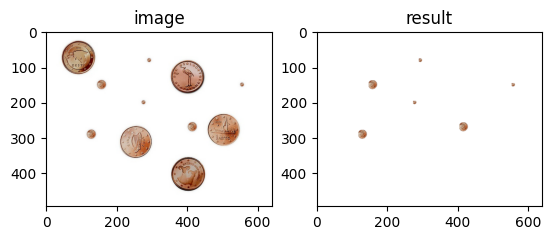

In [50]:
#show original
plt.subplot(1, 2, 1)
plt.imshow(coins, cmap = "gray")
plt.title("image")

#show dilated
plt.subplot(1, 2, 2)
plt.imshow(removed, cmap = "gray")
plt.title("result")

plt.show()

